# 1. Gaussian Naive Bayes (GNB)

In [ ]:
# 1. Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, roc_auc_score

In [55]:
df = pd.read_csv("../2_data/X_train.csv")

# Load the dataset

# Read the dataset from CSV files
X_train = pd.read_csv("../2_data/X_train.csv")
X_test = pd.read_csv("../2_data/X_test.csv")
y_train = pd.read_csv("../2_data/y_train.csv")
y_test = pd.read_csv("../2_data/y_test.csv")

# Ensure the target variable has the correct shape (1D array)
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (5634, 83)
X_test shape: (1409, 83)
y_train shape: (5634,)
y_test shape: (1409,)


## Feature Preparation

In Gaussian Naive Bayes, the features are assumed to be normally distributed.
This means that for each feature, the likelihood of the feature given a class is modeled using a Gaussian (normal) distribution. The parameters of this distribution (mean and variance) are estimated from the training data.

Normally distributed features are continuous and can take any value within a range. Therefore, it is important to split the data to only use features that are continuous (i.e., features with float and integer datatypes that are not boolean encodings). Boolean encodings and categorical features do not follow a normal distribution and can lead to incorrect assumptions and poor performance of the Gaussian Naive Bayes classifier.

By ensuring that only continuous features are used, we can better satisfy the assumptions of the Gaussian Naive Bayes model and improve its accuracy and reliability.

In [56]:
category_columns = []
int_columns = []
float_columns = []
object_columns = []
category_columns = []

for col in df.columns:
    dtype = df[col].dtype
    if dtype == 'object':
        object_columns.append(col)
    elif dtype == 'int64':
        int_columns.append(col)
    elif dtype == 'float64':
        float_columns.append(col)
    else:
        category_columns.append(col)  

print("Integer Columns (int64):")
for col in int_columns:
    print(f" - {col}")

print("\nFloat Columns (float64):")
for col in float_columns:
    print(f" - {col}")

print("\nObject Columns (object):")
for col in object_columns:
    print(f" - {col}")

print("\nCategory Columns (category):")
for col in category_columns:
    print(f" - {col}")

Integer Columns (int64):
 - Count
 - Gender
 - Age
 - Under 30
 - Senior Citizen
 - Married
 - Dependents
 - Number of Dependents
 - City
 - Zip Code
 - Referred a Friend
 - Number of Referrals
 - Tenure in Months
 - Phone Service
 - Multiple Lines
 - Internet Service
 - Avg Monthly GB Download
 - Online Security
 - Online Backup
 - Device Protection Plan
 - Premium Tech Support
 - Streaming TV
 - Streaming Movies
 - Streaming Music
 - Unlimited Data
 - Paperless Billing
 - Total Extra Data Charges
 - Satisfaction Score
 - CLTV
 - Partner
 - Tenure
 - Country_United States
 - State_California
 - Quarter_Q3
 - Offer_Offer A
 - Offer_Offer B
 - Offer_Offer C
 - Offer_Offer D
 - Offer_Offer E
 - Internet Type_Cable
 - Internet Type_DSL
 - Internet Type_Fiber Optic
 - Contract_Month-to-Month
 - Contract_One Year
 - Contract_Two Year
 - Payment Method_Bank Withdrawal
 - Payment Method_Credit Card
 - Payment Method_Mailed Check
 - Device Protection_No
 - Device Protection_No internet service

In [57]:
# Continuous features (floats and original integer types that are not 0/1)
continuous_features = [col for col in df.columns if df[col].dtype == 'float64' or (df[col].dtype == 'int64' and df[col].nunique() > 2)]

print("Continuous Features:")
print(continuous_features)

print(f"Number of continuous features: {len(continuous_features)}")

Continuous Features:
['Age', 'Number of Dependents', 'City', 'Zip Code', 'Latitude', 'Longitude', 'Number of Referrals', 'Tenure in Months', 'Avg Monthly Long Distance Charges', 'Avg Monthly GB Download', 'Monthly Charge', 'Total Charges', 'Total Refunds', 'Total Extra Data Charges', 'Total Long Distance Charges', 'Total Revenue', 'Satisfaction Score', 'CLTV', 'Tenure', 'Monthly Charges', 'Lat', 'Long', 'SeniorCitizen_Dependents', 'Tenure_Age_Ratio', 'AvgMonthlyGB_StreamServices', 'MonthlyCharge_TotalCharges_Ratio', 'AvgMonthlyGB_Tenure', 'Total_Services_Used', 'Streaming_Services_Count', 'Tenure_in_Years', 'Monthly_Charges_Scaled', 'Refund_to_Charges_Ratio', 'Extra_Data_Usage_Cost_Proportion', 'Lifetime_Value_per_Month']
Number of continuous features: 34


Scaling continuous features is generally not necessary for Gaussian Naive Bayes (GNB).

Gaussian Naive Bayes assumes that the continuous features follow a normal (Gaussian) distribution. It calculates the probability of a feature value given a class using the Gaussian probability density function.

Assumption of Normal Distribution: GNB assumes that each feature follows a Gaussian distribution. Scaling does not change the shape of the distribution; it only changes the range of the values. Therefore, scaling does not affect the Gaussian assumption.

Independence of Features: Naive Bayes assumes that features are independent given the class label. This means that the model treats each feature separately, and the scale of one feature does not impact the others.

While scaling is not required for GNB, there are some scenarios where it might be beneficial:

Numerical Stability: If the feature values vary widely, scaling can help improve numerical stability and prevent potential issues with very large or very small numbers.
Comparison with Other Models: If you are comparing GNB with other models that require scaling (like SVM or KNN), you might scale the features for consistency.

In summary, scaling continuous features is not a requirement for Gaussian Naive Bayes due to its assumptions and the nature of the Gaussian distribution. However, it can be considered for numerical stability or consistency when comparing with other models.

In [58]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the continuous features and transform them
X_train_continuous_scaled = scaler.fit_transform(X_train[continuous_features])
X_test_continuous_scaled = scaler.transform(X_test[continuous_features])

# Print the scaled continuous features
print("Scaled Continuous Features (Train):")
print(X_train_continuous_scaled)

print("\nScaled Continuous Features (Test):")
print(X_test_continuous_scaled)

Scaled Continuous Features (Train):
[[-1.39137733 -0.48230353 -1.27350946 ... -0.16825819 -0.11872453
   0.50879151]
 [ 0.75701875  2.62673317  0.8767037  ... -0.16825819 -0.11872453
  -0.27743449]
 [-1.451055   -0.48230353 -0.26183579 ... -0.16825819 -0.11872453
  -0.43519509]
 ...
 [-0.85427831  2.62673317  0.97103983 ...  1.70176241 -0.11872453
  -0.14902546]
 [-0.97363365 -0.48230353  0.16755625 ... -0.16825819 -0.11872453
  -0.44054084]
 [ 1.65218379 -0.48230353 -0.09918729 ...  2.82489435 -0.11872453
  -0.42691019]]

Scaled Continuous Features (Test):
[[-1.27202199e+00 -4.82303528e-01 -7.04239710e-01 ... -1.68258191e-01
   2.95385810e+00  4.24925132e+00]
 [-4.96212297e-01 -4.82303528e-01  1.44272048e+00 ... -1.68258191e-01
  -1.18724528e-01 -3.28447162e-01]
 [-4.36534628e-01 -4.82303528e-01 -1.32230401e+00 ... -1.68258191e-01
  -1.18724528e-01 -4.59953134e-01]
 ...
 [-1.57041034e+00 -4.82303528e-01  1.46874424e+00 ... -1.68258191e-01
  -1.18724528e-01 -1.66674898e-01]
 [-1.092988

We now take a look at the distributions. analyze the int and float datatypes to check if they are normally distributed because this algorithm assumes that the features follow a normal (Gaussian) distribution.

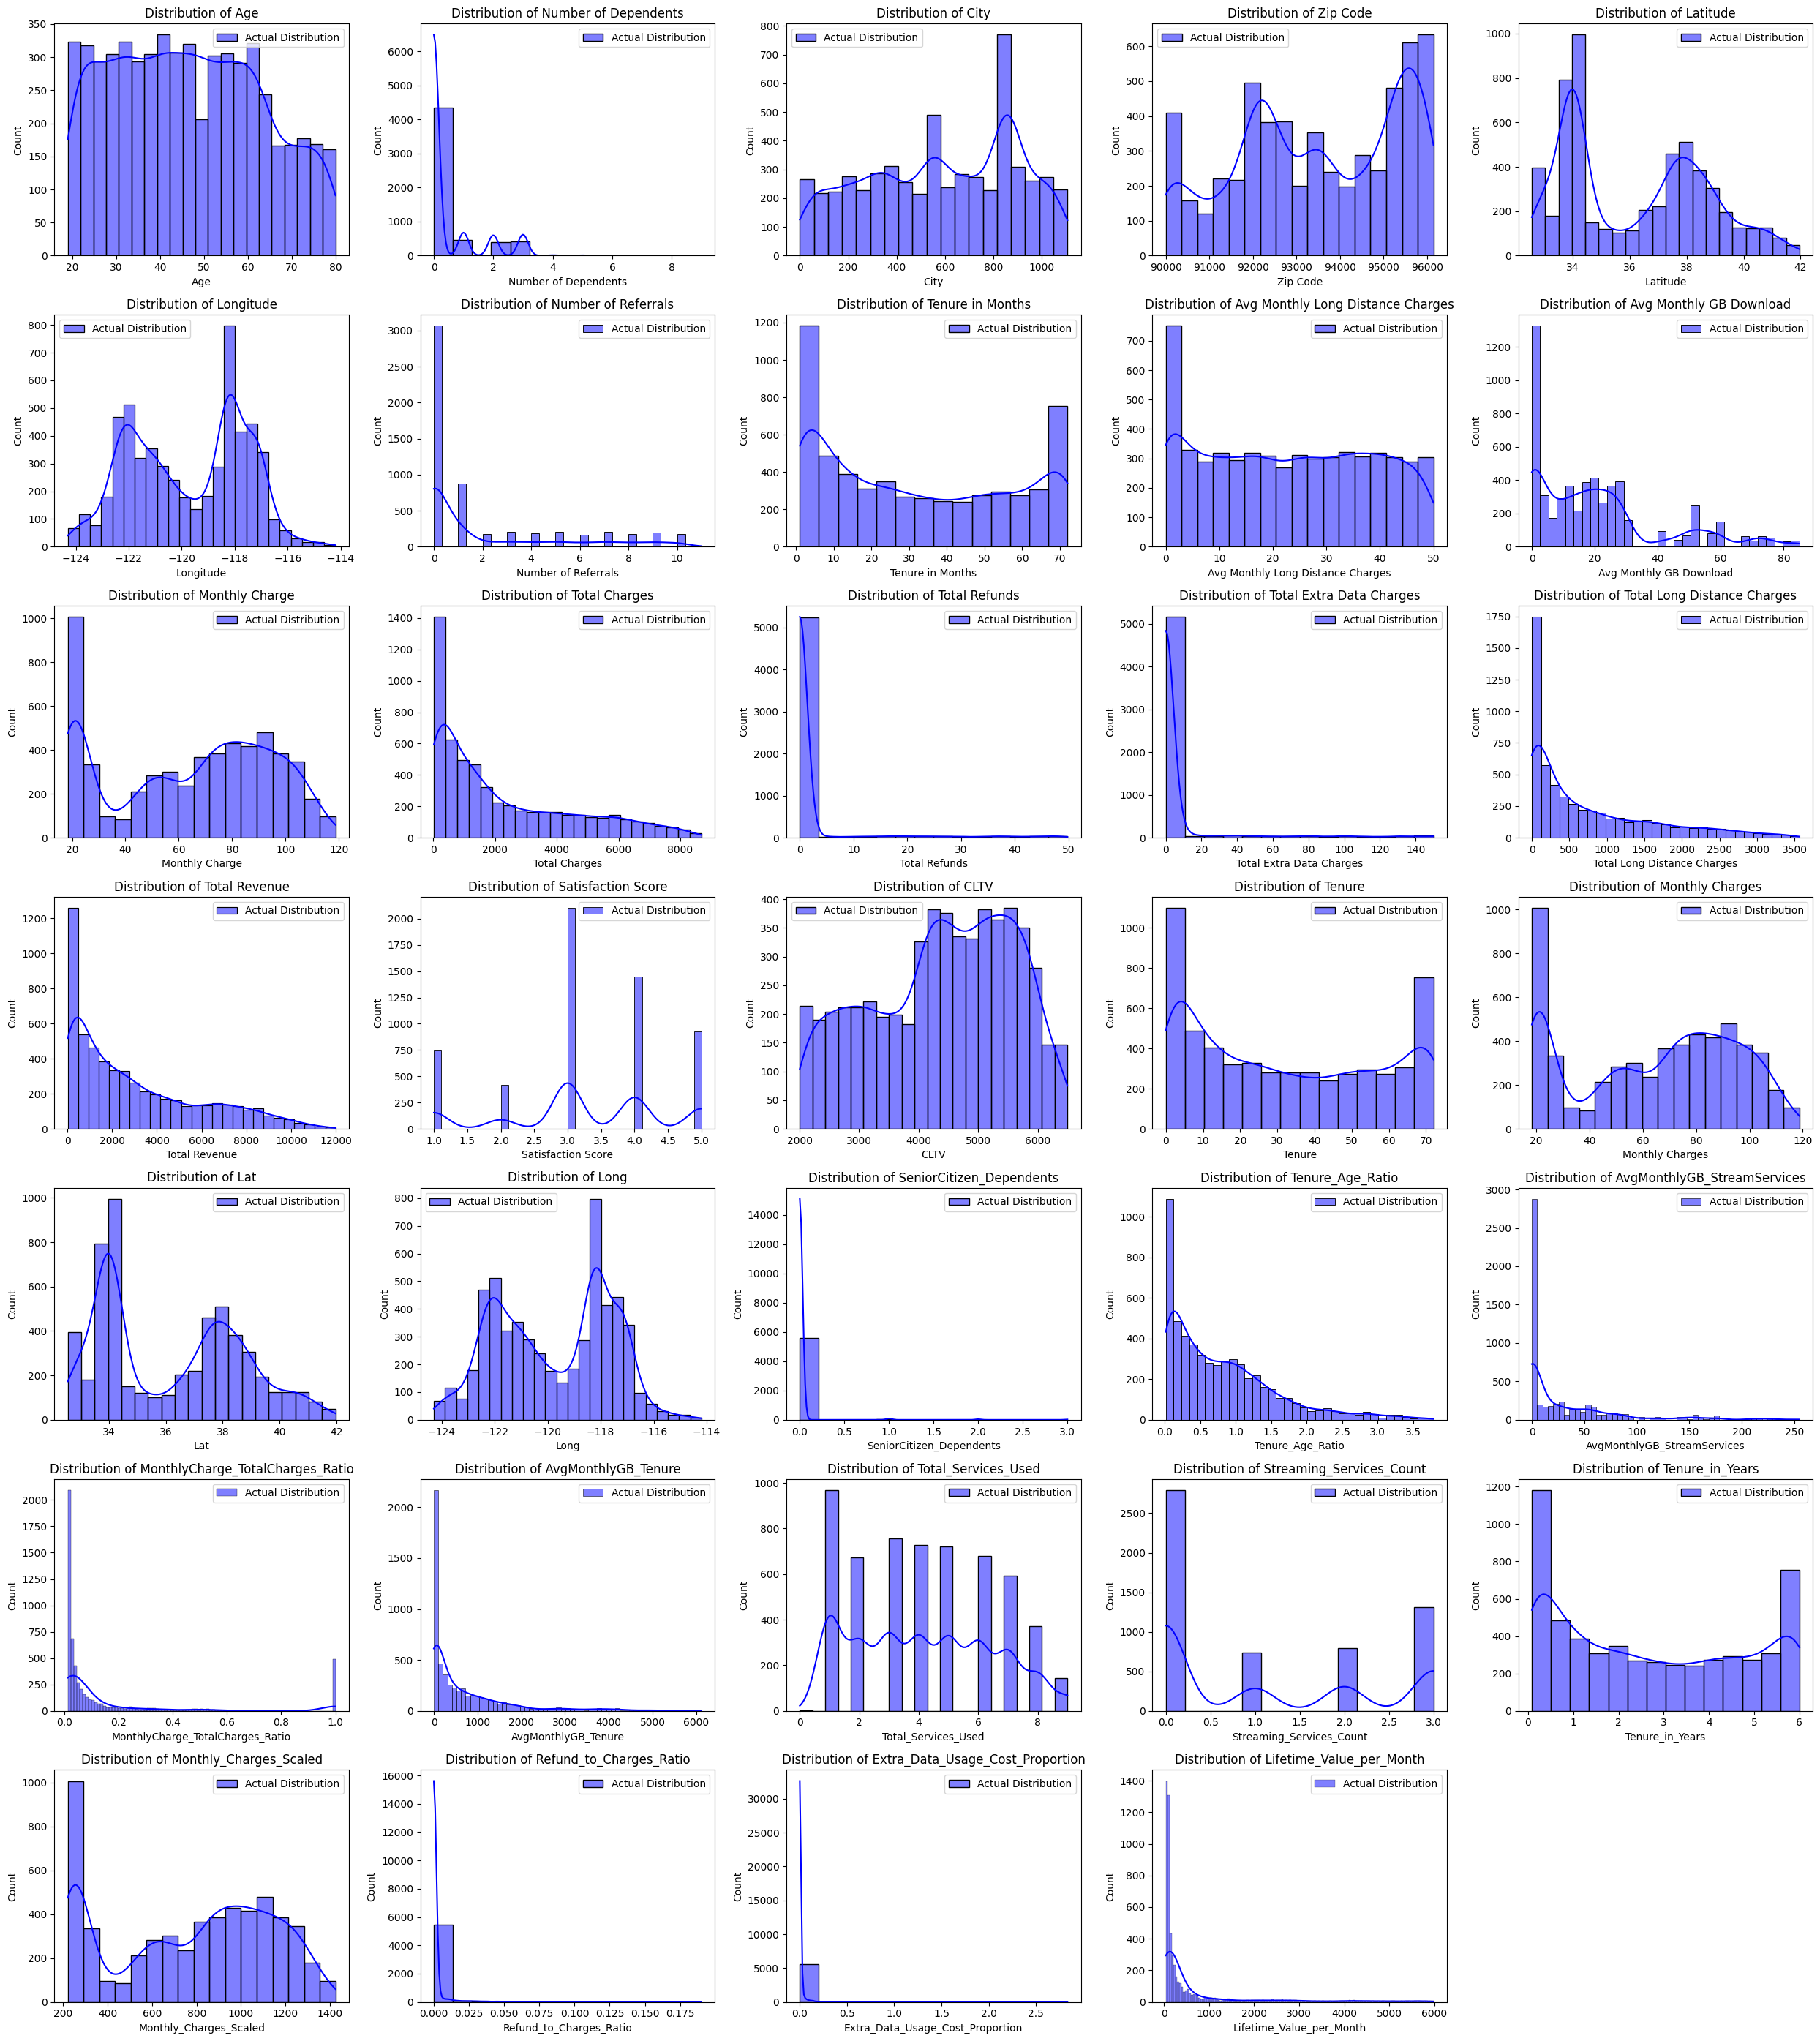

{}

In [59]:
import numpy as np
from scipy.stats import norm, kstest

def get_numeric_features_distribution_info(X_train_continuous_scaled, compare_with_normal_distribution=False):
    # Select numeric features
    numeric_features = continuous_features

    # Set up the matplotlib figure for feature distributions
    num_features = len(numeric_features)
    num_cols = 5
    num_rows = (num_features // num_cols) + 1
    plt.figure(figsize=(num_cols * 5, num_rows * 4))

    # Create a dictionary to store KS statistics and p-values
    ks_results = {}

    for i, feature in enumerate(numeric_features, 1):
        # Plot histograms for each numeric feature
        plt.subplot(num_rows, num_cols, i)
        sns.histplot(df[feature], kde=True, color='blue', label='Actual Distribution')

        if compare_with_normal_distribution:
            # Plot the normal distribution line
            mu, std = df[feature].mean(), df[feature].std()
            xmin, xmax = plt.xlim()
            x = np.linspace(xmin, xmax, 100)
            p = norm.pdf(x, mu, std)
            scale_factor = len(df[feature]) / len(x)
            plt.plot(x, p * scale_factor, 'y', linewidth=2, label='Normal Distribution')

            # Calculate metrics for comparison
            ks_statistic, ks_p_value = kstest(df[feature], 'norm', args=(mu, std))
            print(f"{feature} - KS Statistic: {ks_statistic}, KS P-Value: {ks_p_value}")

            # Store metrics in the dictionary
            ks_results[feature] = {'ks_statistic': ks_statistic, 'ks_p_value': ks_p_value}

        plt.title(f'Distribution of {feature}')
        plt.legend()

    plt.tight_layout()
    plt.show()

    return ks_results
    

def get_feature_distribution(df, target_column='track_genre'):
    # Display the first 10 instances of the target variable
    print(f"First 10 instances of '{target_column}':")
    print(df[target_column].head(10))

    # Display value counts for the target variable
    print(f"\nValue counts for '{target_column}':")
    print(df[target_column].value_counts())

    # Display the distribution of the target variable with counts on the y-axis
    value_counts = df[target_column].value_counts()

    plt.figure(figsize=(12, 6))
    barplot = sns.barplot(x=value_counts.index, y=value_counts.values, color='skyblue')
    plt.title(f'Distribution of {target_column} with Counts')
    plt.xlabel(target_column)
    plt.ylabel('Count')

    # Rotate x-labels vertically and set font size
    barplot.set_xticklabels(barplot.get_xticklabels(), rotation=90, fontsize=8)

    plt.show()

get_numeric_features_distribution_info(df)


As redundant and irrelevant variables can decrease performance of the Naive Bayes, we will try to omit them. Correlation matrix will help us to reveal redundant features (features with strong correlation)

Strongly correlated pairs of features and their correlation values (sorted):
Monthly Charge and Monthly_Charges_Scaled: 1.0000000000000022
Monthly Charges and Monthly_Charges_Scaled: 1.0000000000000022
Latitude and Lat: 1.0
Monthly Charge and Monthly Charges: 1.0
Tenure in Months and Tenure_in_Years: 0.9999999999999988
Longitude and Long: 0.9999999999998697
Tenure and Tenure_in_Years: 0.9998974874689024
Tenure in Months and Tenure: 0.9998974874688928
Total Charges and Total Revenue: 0.971982233877086
MonthlyCharge_TotalCharges_Ratio and Lifetime_Value_per_Month: 0.9484613719198068
Zip Code and Latitude: 0.894423587030175
Zip Code and Lat: 0.894423587030175
Tenure in Months and Total Revenue: 0.8516089667645729
Total Revenue and Tenure_in_Years: 0.8516089667645711
Total Revenue and Tenure: 0.8515610440177082
Total_Services_Used and Streaming_Services_Count: 0.8514471629193939
Tenure in Months and Total Charges: 0.8234089305147175
Total Charges and Tenure_in_Years: 0.8234089305147156
Tot

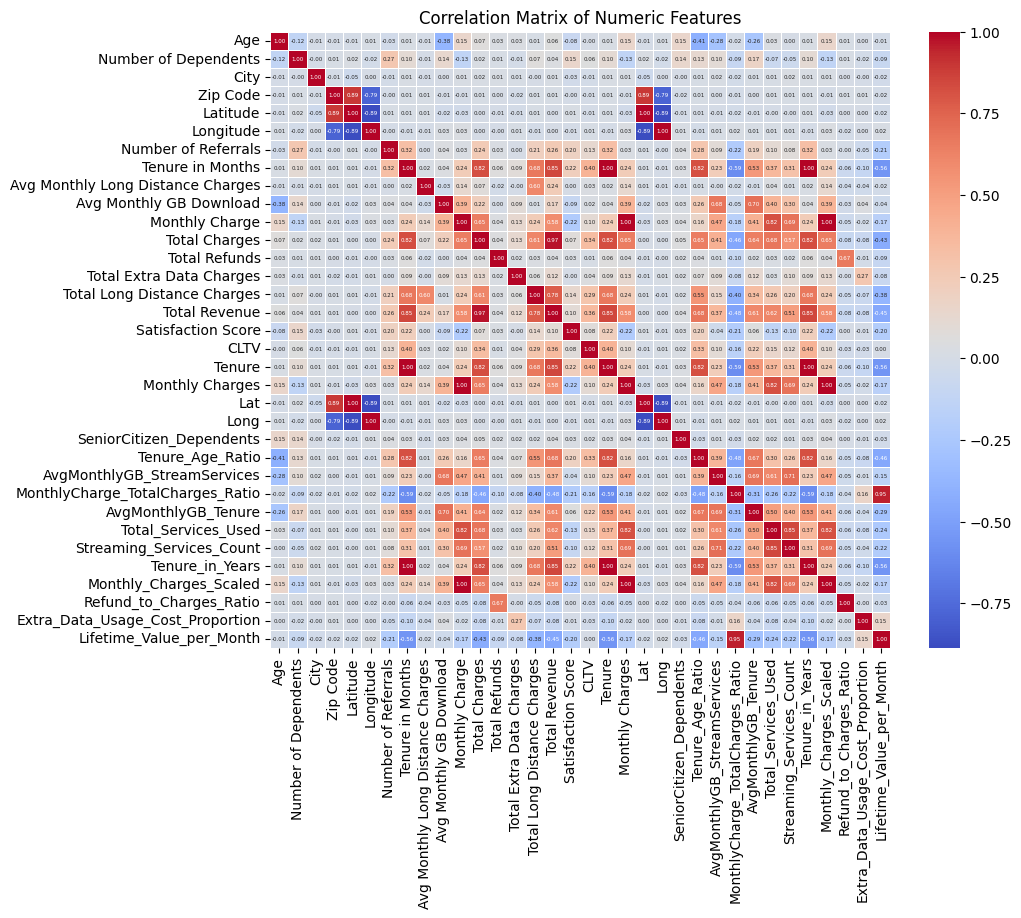

In [60]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your original DataFrame
numeric_features = df[continuous_features]

# Compute the correlation matrix among numeric features
correlation_matrix = numeric_features.corr()

# Set the upper triangle of the correlation matrix (including the diagonal) to NaN
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Find strongly correlated pairs of features (using a threshold, e.g., 0.5)
strongly_correlated_pairs = []
for i in range(len(upper_triangle.columns)):
    for j in range(i + 1, len(upper_triangle.columns)):
        if upper_triangle.iloc[i, j] > 0.5:
            feature_i, feature_j = upper_triangle.columns[i], upper_triangle.columns[j]
            correlation_value = upper_triangle.iloc[i, j]
            strongly_correlated_pairs.append((feature_i, feature_j, correlation_value))

# Sort strongly correlated pairs in decreasing order of correlation values
strongly_correlated_pairs.sort(key=lambda x: x[2], reverse=True)

# Display strongly correlated pairs and their correlation values
print("Strongly correlated pairs of features and their correlation values (sorted):")
for pair in strongly_correlated_pairs:
    print(f"{pair[0]} and {pair[1]}: {pair[2]}")

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, annot_kws={"size": 4})
plt.title('Correlation Matrix of Numeric Features')
plt.show()

Upon evaluating the correlation matrix, it is observed that some features are highly correlated with a correlation coefficient of 1.00. These features include:

- Monthly Charge and Monthly_Charges_Scaled: 1.0000000000000022
    - Reason: Both features represent the same information but on different scales.
    - Action: Remove `Monthly_Charges_Scaled`.

- Monthly Charges and Monthly_Charges_Scaled: 1.0000000000000022
    - Reason: Both features represent the same information but on different scales.
    - Action: Remove `Monthly_Charges_Scaled`.

- Latitude and Lat: 1.0
    - Reason: Both features represent the same geographical information.
    - Action: Remove `Lat`.

- Monthly Charge and Monthly Charges: 1.0
    - Reason: Both features represent the same information.
    - Action: Remove `Monthly Charges`.

- Tenure in Months and Tenure_in_Years: 0.9999999999999988
    - Reason: Both features represent the same information but in different units.
    - Action: Remove `Tenure_in_Years`.

- Longitude and Long: 0.9999999999998697
    - Reason: Both features represent the same geographical information.
    - Action: Remove `Long`.

- Tenure and Tenure_in_Years: 0.9998974874689024
    - Reason: Both features represent the same information but in different units.
    - Action: Remove `Tenure_in_Years`.

- Tenure in Months and Tenure: 0.9998974874688928
    - Reason: Both features represent the same information but in different units.
    - Action: Remove `Tenure`.

- Total Charges and Total Revenue: 0.971982233877086
    - Reason: Both features represent cumulative financial information.
    - Action: Remove `Total Revenue`.

Such high correlations indicate redundancy, as these features provide the same information. It is advisable to remove one of each pair of highly correlated features to avoid multicollinearity and improve the model's performance.

In [61]:
# Remove highly correlated features
features_to_remove = ['Monthly_Charges_Scaled', 'Lat', 'Monthly Charges', 'Tenure_in_Years', 'Long', 'Tenure', 'Total Revenue']

# Drop the features from the training and test datasets
X_train.drop(columns=features_to_remove, inplace=True)
X_test.drop(columns=features_to_remove, inplace=True)

# Update the continuous features list
continuous_features = [feature for feature in continuous_features if feature not in features_to_remove]

print("Updated continuous features:")
print(continuous_features)


Updated continuous features:
['Age', 'Number of Dependents', 'City', 'Zip Code', 'Latitude', 'Longitude', 'Number of Referrals', 'Tenure in Months', 'Avg Monthly Long Distance Charges', 'Avg Monthly GB Download', 'Monthly Charge', 'Total Charges', 'Total Refunds', 'Total Extra Data Charges', 'Total Long Distance Charges', 'Satisfaction Score', 'CLTV', 'SeniorCitizen_Dependents', 'Tenure_Age_Ratio', 'AvgMonthlyGB_StreamServices', 'MonthlyCharge_TotalCharges_Ratio', 'AvgMonthlyGB_Tenure', 'Total_Services_Used', 'Streaming_Services_Count', 'Refund_to_Charges_Ratio', 'Extra_Data_Usage_Cost_Proportion', 'Lifetime_Value_per_Month']


## Applying GNB

Apply gaussian naive bayes on remaining features.

In [62]:
from sklearn.naive_bayes import GaussianNB

# Initialize the Gaussian Naive Bayes classifier
gnb = GaussianNB()

X_train_reduced = X_train
X_test_reduced = X_test

# Fit the model on the continuous features
gnb.fit(X_train[continuous_features], y_train)

# Predict using the model
y_pred_continuous = gnb.predict(X_test[continuous_features])

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_continuous)
precision = precision_score(y_test, y_pred_continuous)
recall = recall_score(y_test, y_pred_continuous)
f1 = f1_score(y_test, y_pred_continuous)
roc_auc = roc_auc_score(y_test, y_pred_continuous)

print(f'Accuracy (Continuous Features): {accuracy:.2f}')
print(f'Precision (Continuous Features): {precision:.2f}')
print(f'Recall (Continuous Features): {recall:.2f}')
print(f'F1 (Continuous Features): {f1:.2f}')


Accuracy (Continuous Features): 0.86
Precision (Continuous Features): 0.69
Recall (Continuous Features): 0.86
F1 (Continuous Features): 0.77


## Parameter tuning

Via cross validation we will try to calculate the best portion of the largest variance of all features that is added to variances for calculation stability (var_smoothing)

In [66]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score

# Initialize the Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=nb_classifier, param_grid=param_grid, scoring=make_scorer(f1_score, average='weighted'), cv=5)

# Fit the grid search to the data
grid_search.fit(X_train[continuous_features], y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

print(f"Best Hyperparameters: {best_params}")


Best Hyperparameters: {'var_smoothing': 1e-09}


In [67]:
# train model with best hyperparameter

# Train the classifier with the best hyperparameters
best_nb_classifier = GaussianNB(var_smoothing=best_params['var_smoothing'])
best_nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
predictions = best_nb_classifier.predict(X_test)

In [68]:
# Evaluate the tuned model
accuracy_tuned = accuracy_score(y_test, predictions)
precision_tuned = precision_score(y_test, predictions)
recall_tuned = recall_score(y_test, predictions)
f1_tuned = f1_score(y_test, predictions)
roc_auc_tuned = roc_auc_score(y_test, predictions)

print(f'Accuracy (Tuned Model): {accuracy_tuned:.2f}')
print(f'Precision (Tuned Model): {precision_tuned:.2f}')
print(f'Recall (Tuned Model): {recall_tuned:.2f}')
print(f'F1 (Tuned Model): {f1_tuned:.2f}')
print(f'ROC AUC (Tuned Model): {roc_auc_tuned:.2f}')

Accuracy (Tuned Model): 0.83
Precision (Tuned Model): 0.64
Recall (Tuned Model): 0.84
F1 (Tuned Model): 0.72
ROC AUC (Tuned Model): 0.83


## Over-/Undersampling

In [72]:
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.pipeline import Pipeline

# Define different sampling techniques
oversamplers = [RandomOverSampler(random_state=42), SMOTE(random_state=42)]
undersamplers = [RandomUnderSampler(random_state=42), NearMiss(version=1)]

# Loop through different oversampling techniques
for oversampler in oversamplers:
    # Define the pipeline with oversampling
    sampling_pipeline = Pipeline([
        ('oversampler', oversampler),
        ('classifier', best_nb_classifier)
    ])

    # Perform cross-validation with oversampling
    oversampling_scores = cross_val_score(sampling_pipeline, X_train[continuous_features], y_train, scoring='f1_weighted', cv=5)
    
    # Print the results
    print(f"Oversampling with {oversampler.__class__.__name__} scores:", oversampling_scores.mean())

# Loop through different undersampling techniques
for undersampler in undersamplers:
    # Define the pipeline with undersampling
    sampling_pipeline = Pipeline([
        ('undersampler', undersampler),
        ('classifier', best_nb_classifier)
    ])

    # Perform cross-validation with undersampling
    undersampling_scores = cross_val_score(sampling_pipeline, X_train[continuous_features], y_train, scoring='f1_weighted', cv=5)
    
    # Print the results
    print(f"Undersampling with {undersampler.__class__.__name__} scores:", undersampling_scores.mean())

Oversampling with RandomOverSampler scores: 0.8379523821671485
Oversampling with SMOTE scores: 0.854427840845928
Undersampling with RandomUnderSampler scores: 0.8426537547161148
Undersampling with NearMiss scores: 0.6123817154217237


### Evaluation of Over- and Undersampling Techniques

#### Oversampling Techniques
1. **RandomOverSampler**
    - **Score:** 0.8379523821671485
    - **Analysis:** This technique provides a decent improvement in the F1 score, indicating that it helps in balancing the dataset and improving the model's performance.

2. **SMOTE (Synthetic Minority Over-sampling Technique)**
    - **Score:** 0.854427840845928
    - **Analysis:** SMOTE outperforms RandomOverSampler, providing the highest F1 score among all techniques. This suggests that generating synthetic samples helps in better capturing the underlying data distribution.

#### Undersampling Techniques
1. **RandomUnderSampler**
    - **Score:** 0.8426537547161148
    - **Analysis:** This technique also shows a good improvement in the F1 score, but it is slightly lower than SMOTE. It indicates that reducing the majority class helps in balancing the dataset but may lead to loss of information.

2. **NearMiss**
    - **Score:** 0.6123817154217237
    - **Analysis:** This technique provides the lowest F1 score among all techniques. It suggests that this method might be too aggressive in reducing the majority class, leading to a significant loss of information.

Based on the evaluation, **SMOTE** provides the best performance with the highest F1 score. It effectively balances the dataset by generating synthetic samples, leading to improved model performance.

In [73]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# 1. Use SMOTE for Oversampling
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train[continuous_features], y_train)

# 2. Model Training and Evaluation
# Initialize the Gaussian Naive Bayes classifier
gnb_smote = GaussianNB()

# Train the model on the oversampled dataset
gnb_smote.fit(X_train_smote, y_train_smote)

# Predict using the model
y_pred_smote = gnb_smote.predict(X_test[continuous_features])

# Evaluate the model
accuracy_smote = accuracy_score(y_test, y_pred_smote)
precision_smote = precision_score(y_test, y_pred_smote)
recall_smote = recall_score(y_test, y_pred_smote)
f1_smote = f1_score(y_test, y_pred_smote)
roc_auc_smote = roc_auc_score(y_test, y_pred_smote)

print(f'Accuracy (SMOTE): {accuracy_smote:.2f}')
print(f'Precision (SMOTE): {precision_smote:.2f}')
print(f'Recall (SMOTE): {recall_smote:.2f}')
print(f'F1 (SMOTE): {f1_smote:.2f}')
print(f'ROC AUC (SMOTE): {roc_auc_smote:.2f}')

# 3. Hyperparameter Tuning
# Define the parameter grid for hyperparameter tuning
param_grid_smote = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

# Initialize GridSearchCV with 5-fold cross-validation
grid_search_smote = GridSearchCV(estimator=gnb_smote, param_grid=param_grid_smote, scoring='f1', cv=5)

# Fit the grid search to the data
grid_search_smote.fit(X_train_smote, y_train_smote)

# Get the best hyperparameters
best_params_smote = grid_search_smote.best_params_

print(f"Best Hyperparameters (SMOTE): {best_params_smote}")

# 4. Cross-Validation
# Perform cross-validation with the best hyperparameters
best_gnb_smote = GaussianNB(var_smoothing=best_params_smote['var_smoothing'])
cross_val_scores = cross_val_score(best_gnb_smote, X_train_smote, y_train_smote, scoring='f1', cv=5)

print(f"Cross-Validation F1 Scores (SMOTE): {cross_val_scores}")
print(f"Mean Cross-Validation F1 Score (SMOTE): {cross_val_scores.mean():.2f}")

Accuracy (SMOTE): 0.86
Precision (SMOTE): 0.69
Recall (SMOTE): 0.84
F1 (SMOTE): 0.75
ROC AUC (SMOTE): 0.85
Best Hyperparameters (SMOTE): {'var_smoothing': 1e-09}
Cross-Validation F1 Scores (SMOTE): [0.83778745 0.86961795 0.88428325 0.87058824 0.89072652]
Mean Cross-Validation F1 Score (SMOTE): 0.87


In [74]:
evaluation_metrics = {
    "accuracy": accuracy_smote,
    "precision": precision_smote,
    "recall": recall_smote,
    "f1": f1_smote,
    "roc_auc": roc_auc_smote
}
evaluation_df = pd.DataFrame([evaluation_metrics])
evaluation_df.to_csv("../2_data/evaluation_metrics/GNB.csv", index=False)


## Evaluation

1. **Accuracy**
    - Accuracy measures the proportion of correct classifications made by the model. In the context of customer churn prediction, it indicates the overall number of customers correctly classified as either churned or not churned.
    - In this project, an accuracy of 0.86 suggests that the tuned GNB model with SMOTE performs well in distinguishing between customers who will churn and those who will not. However, accuracy alone may not be the most reliable metric for an imbalanced dataset, like churn prediction, where the number of churned customers is much smaller compared to non-churned customers.

2. **Precision and Recall**
    - Precision is the proportion of correctly predicted positive observations (churned customers) out of all observations predicted to be positive.
    - Recall is the proportion of correctly predicted positive observations out of all actual positive observations (all churned customers).
    - In churn prediction, precision helps to minimize false positives, ensuring that customers classified as likely to churn are actually at risk of churning. Recall helps to minimize false negatives, ensuring the model does not miss many of the churned customers. These metrics are particularly useful when dealing with imbalanced datasets.
    - The tuned GNB model with SMOTE achieved a precision of 0.69 and a recall of 0.84, indicating that while it is good at identifying most of the churned customers, there is still a significant number of false positives.

3. **F1-Score**
    - The F1-Score is the harmonic mean of precision and recall, providing a balance between both metrics. It is particularly useful when you need a single score that considers both false positives and false negatives.
    - In churn prediction, the F1-score is useful because it provides a balance between precision and recall, especially when a high recall or high precision alone might not be sufficient. The tuned GNB model with SMOTE achieved an F1-score of 0.75, indicating a good balance between precision and recall.

4. **ROC-AUC Score**
    - The ROC-AUC score measures the ability of the model to distinguish between positive and negative classes (churned vs. not churned). It is a summary of the ROC curve, where AUC represents the area under the curve. A higher AUC value indicates better performance in distinguishing between the two classes.
    - In churn prediction, the ROC-AUC score helps evaluate the model's ability to correctly differentiate churned customers from those who do not churn. It is particularly useful in assessing different thresholds to understand the model's overall performance in distinguishing between classes.

### Reason for Using Gaussian Naive Bayes (GNB)
- Gaussian Naive Bayes is chosen because it assumes that the features follow a normal distribution, which is suitable for continuous features.
- GNB is computationally efficient and works well with high-dimensional data, making it a good choice for initial modeling and quick evaluations.
- Despite its simplicity, GNB often performs surprisingly well on various classification tasks, including churn prediction.

### Interpretation of Results
- The tuned GNB model with SMOTE achieved a high recall, indicating that it successfully identifies most of the churned customers. This is crucial in churn prediction, where missing out on churned customers can be costly.
- The precision is moderate, suggesting that there are some false positives. This means that some customers predicted to churn may not actually churn.
- The F1-score of 0.75 indicates a good balance between precision and recall, making the tuned GNB model with SMOTE a reliable choice for identifying at-risk customers.
- Overall, the tuned GNB model with SMOTE provides a solid baseline for churn prediction, and further tuning or more complex models can be explored to improve precision while maintaining high recall.

### Cross-Validation Results
- The cross-validation F1 scores for the tuned GNB model with SMOTE are [0.83778745, 0.86961795, 0.88428325, 0.87058824, 0.89072652], with a mean cross-validation F1 score of 0.87. This indicates that the model performs consistently well across different folds of the data.


## Summary

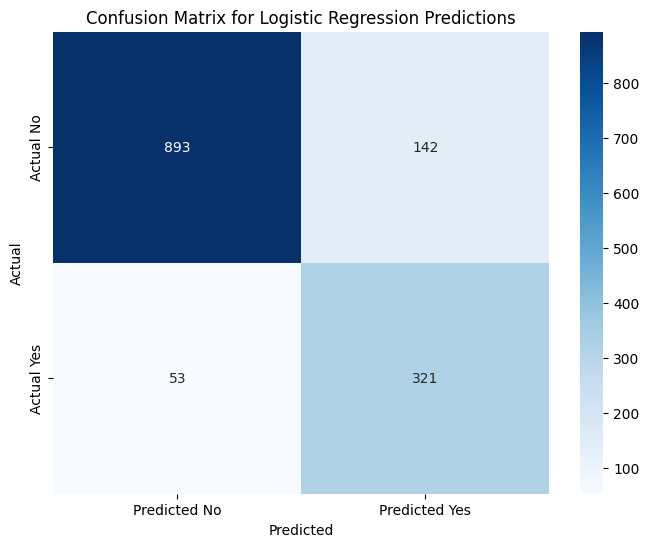

In [75]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_continuous)

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted No', 'Predicted Yes'], yticklabels=['Actual No', 'Actual Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression Predictions')
plt.show()